In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the dataset
df = pd.read_csv('Large Cars Dataset.csv')
df

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [7]:
#Check for duplicates
df.duplicated().sum()

0

In [ ]:
#Check data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         428 non-null    object 
 1   Model         428 non-null    object 
 2   VehicleClass  428 non-null    object 
 3   Region        428 non-null    object 
 4   DriveTrain    428 non-null    object 
 5   MSRP          428 non-null    object 
 6   DealerCost    428 non-null    object 
 7   EngineSize    428 non-null    float64
 8   Cylinders     426 non-null    float64
 9   HorsePower    428 non-null    int64  
 10  MPG_City      428 non-null    int64  
 11  MPG_Highway   428 non-null    int64  
 12  Weight        428 non-null    int64  
 13  Wheelbase     428 non-null    int64  
 14  Length        428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [12]:
df.describe()

,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [15]:
#Check for missing values count
df.Cylinders.isnull().sum()

2

In [17]:
#Fill missing values with mean of the column 
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mean())
df.Cylinders.isnull().sum()


0

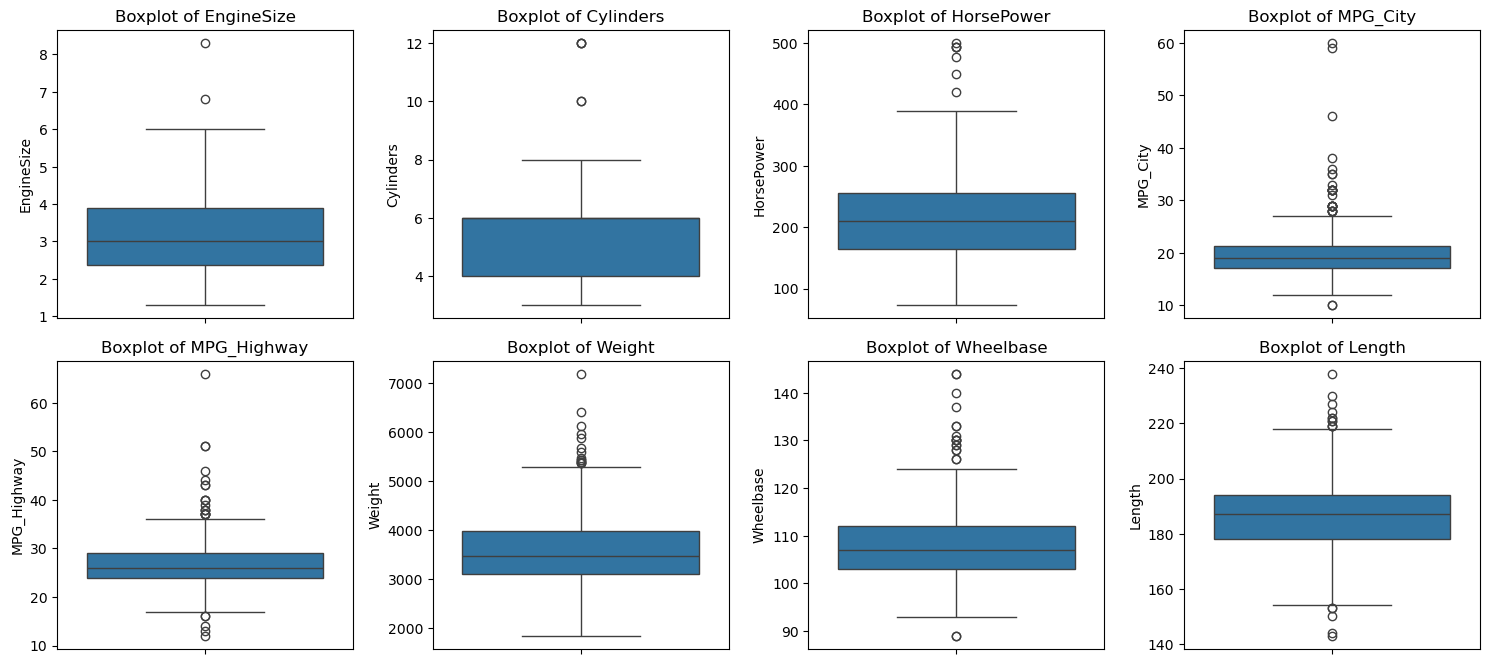

<Figure size 1200x800 with 0 Axes>

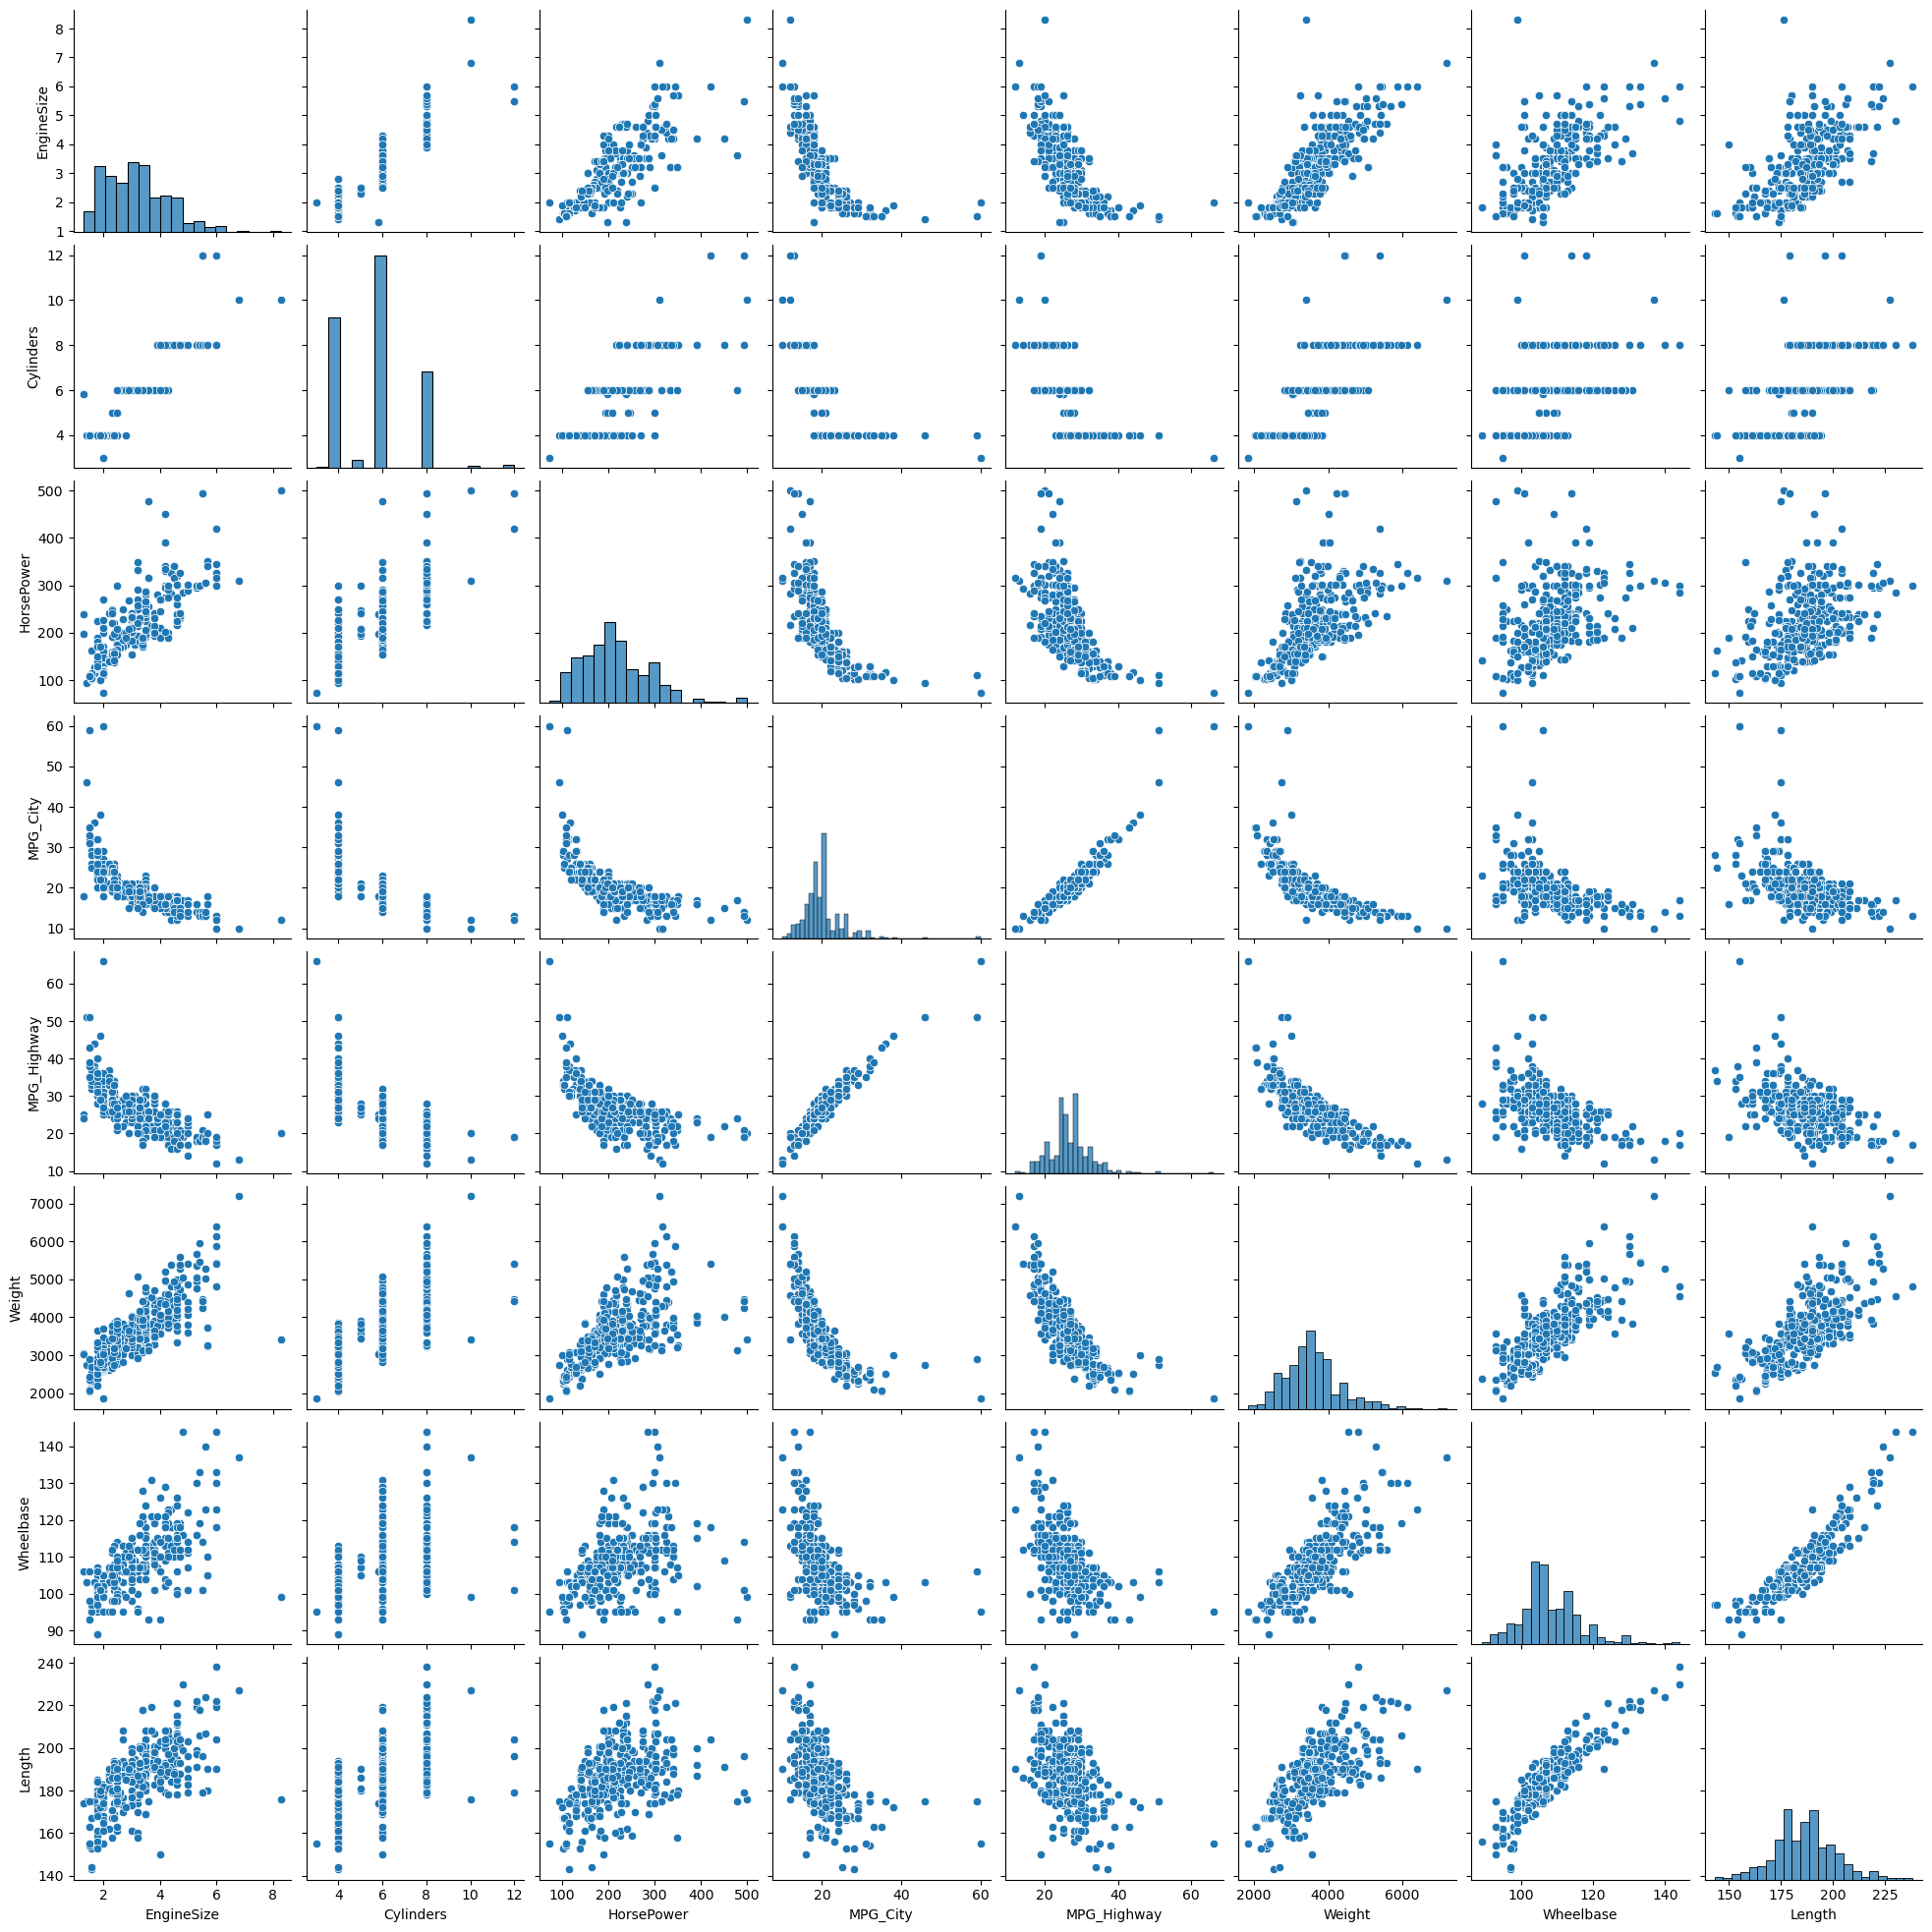

In [18]:
#check for outliers on all numeric columns using boxplots 
# Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Alternative using seaborn's pairplot for correlation visualization
plt.figure(figsize=(12, 8))
sns.pairplot(df[numeric_cols])
plt.show()


In [20]:
#conclusion based on pairplot 
# Based on the pairplot analysis, we can make several key observations:

# 1. Strong positive correlations:
# - Horsepower and EngineSize show a strong positive correlation.
# - Weight and Length are positively correlated, as are Weight and Wheelbase.
# - MSRP and DealerCost show a very strong positive linear relationship.

# 2. Negative correlations:
# - MPG_City and MPG_Highway are negatively correlated with Horsepower, Weight, and EngineSize.
# - This indicates that more powerful or heavier vehicles tend to be less fuel-efficient.

# 3. Distribution patterns:
# - Many numeric variables exhibit right-skewed distributions, particularly:
#   - Horsepower
#   - MSRP
#   - DealerCost
#   - Weight (mild skew)
# - Several variables also show visible outliers.

# 4. Key insights:
# - Larger and more powerful engines tend to have lower fuel efficiency.
# - More expensive vehicles tend to be larger, heavier, and more powerful.
# - Physical dimensions such as Length and Wheelbase are positively correlated with Weight, suggesting a structural relationship.
# - Fuel efficiency (MPG) is inversely related to vehicle size and engine power.

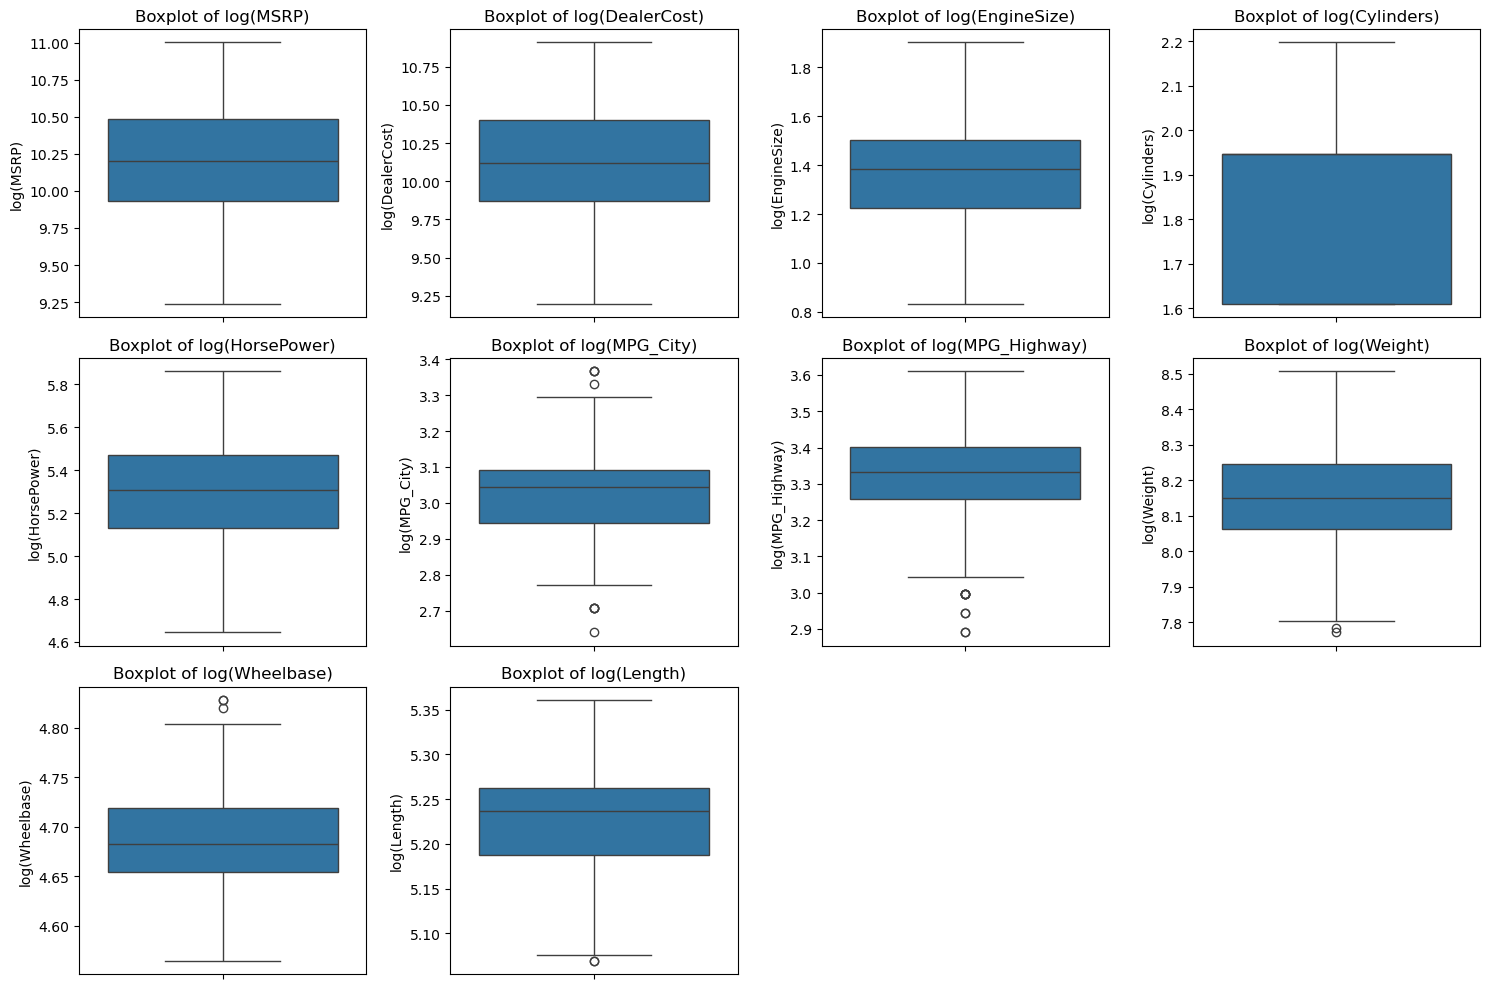


Skewness comparison before and after log transformation:
MSRP: Original skew = 0.63, Log skew = -0.14
DealerCost: Original skew = 0.64, Log skew = -0.10
EngineSize: Original skew = 0.52, Log skew = 0.05
Cylinders: Original skew = 0.23, Log skew = -0.10
HorsePower: Original skew = 0.53, Log skew = -0.13
MPG_City: Original skew = 0.57, Log skew = 0.21
MPG_Highway: Original skew = -0.07, Log skew = -0.47
Weight: Original skew = 0.34, Log skew = -0.06
Wheelbase: Original skew = 0.19, Log skew = 0.03
Length: Original skew = -0.07, Log skew = -0.24

Outlier statistics:
MSRP: 1 outliers removed
DealerCost: 2 outliers removed
EngineSize: 4 outliers removed
Cylinders: 0 outliers removed
HorsePower: 10 outliers removed
MPG_City: 23 outliers removed
MPG_Highway: 5 outliers removed
Weight: 6 outliers removed
Wheelbase: 3 outliers removed
Length: 0 outliers removed


In [ ]:
#handling of outliers using log transformation
# Create log transformations and handle outliers for all numeric columns
df_log = df.copy()

# First convert string columns to numeric by removing $ and , characters
for col in ['MSRP', 'DealerCost']:
    df_log[col] = df_log[col].str.replace('$', '').str.replace(',', '').astype(float)

# Get all numeric columns
numeric_cols = df_log.select_dtypes(include=['float64', 'int64']).columns

# Function to handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply log transformation and handle outliers
for col in numeric_cols:
    # First remove outliers
    df_log = remove_outliers(df_log, col)
    # Then apply log transformation
    df_log[f'log_{col}'] = np.log1p(df_log[col])

# Create boxplots for log-transformed features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df_log, y=f'log_{col}')
    plt.title(f'Boxplot of log({col})')
    plt.ylabel(f'log({col})')
plt.tight_layout()
plt.show()

# Print skewness comparison and outlier statistics
print("\nSkewness comparison before and after log transformation:")
for col in numeric_cols:
    original_skew = df_log[col].skew()
    log_skew = df_log[f'log_{col}'].skew()
    print(f"{col}: Original skew = {original_skew:.2f}, Log skew = {log_skew:.2f}")

print("\nOutlier statistics:")
for col in numeric_cols:
    Q1 = df_log[col].quantile(0.25)
    Q3 = df_log[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_log[(df_log[col] < lower_bound) | (df_log[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers removed")


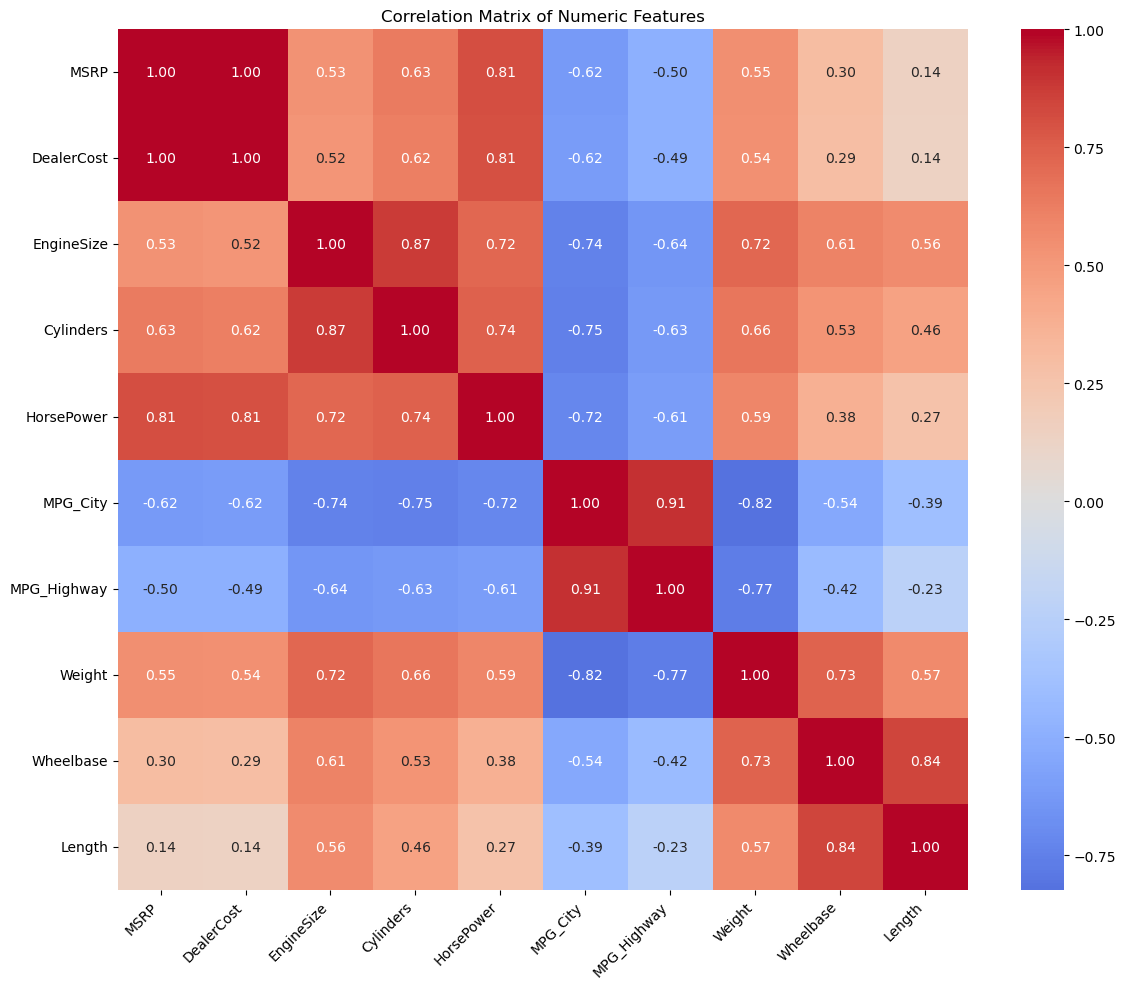

In [ ]:
#check correlation# Calculate correlation matrix for numeric columns
correlation_matrix = df_log[numeric_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [37]:
#Drop index column
df = df_log.reset_index()
df = df.drop('index', axis=1)
df


,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,...,log_MSRP,log_DealerCost,log_EngineSize,log_Cylinders,log_HorsePower,log_MPG_City,log_MPG_Highway,log_Weight,log_Wheelbase,log_Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,...,10.517213,10.414453,1.504077,1.945910,5.583496,2.890372,3.178054,8.401109,4.672829,5.247024
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,...,10.078323,9.987921,1.098612,1.609438,5.303305,3.218876,3.465736,7.929846,4.624973,5.153292
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,...,10.203259,10.112451,1.223775,1.609438,5.303305,3.135494,3.401197,8.080547,4.663439,5.214936
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,...,10.410185,10.318903,1.435085,1.945910,5.602119,3.044522,3.367296,8.182000,4.691348,5.231109
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,...,10.686384,10.571701,1.504077,1.945910,5.420535,2.944439,3.218876,8.263848,4.753590,5.288267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197,...,10.610686,10.550696,1.223775,1.791759,5.288267,3.091042,3.367296,8.146419,4.663439,5.231109
327,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242,...,10.658811,10.598733,1.193922,1.791759,5.493061,3.044522,3.295837,8.146419,4.663439,5.231109
328,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268,...,10.719096,10.658999,1.360977,1.945910,5.594711,2.995732,3.295837,8.203578,4.709530,5.252273
329,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170,...,10.171069,10.112208,1.064711,1.609438,5.141664,3.135494,3.401197,7.945555,4.624973,5.198497


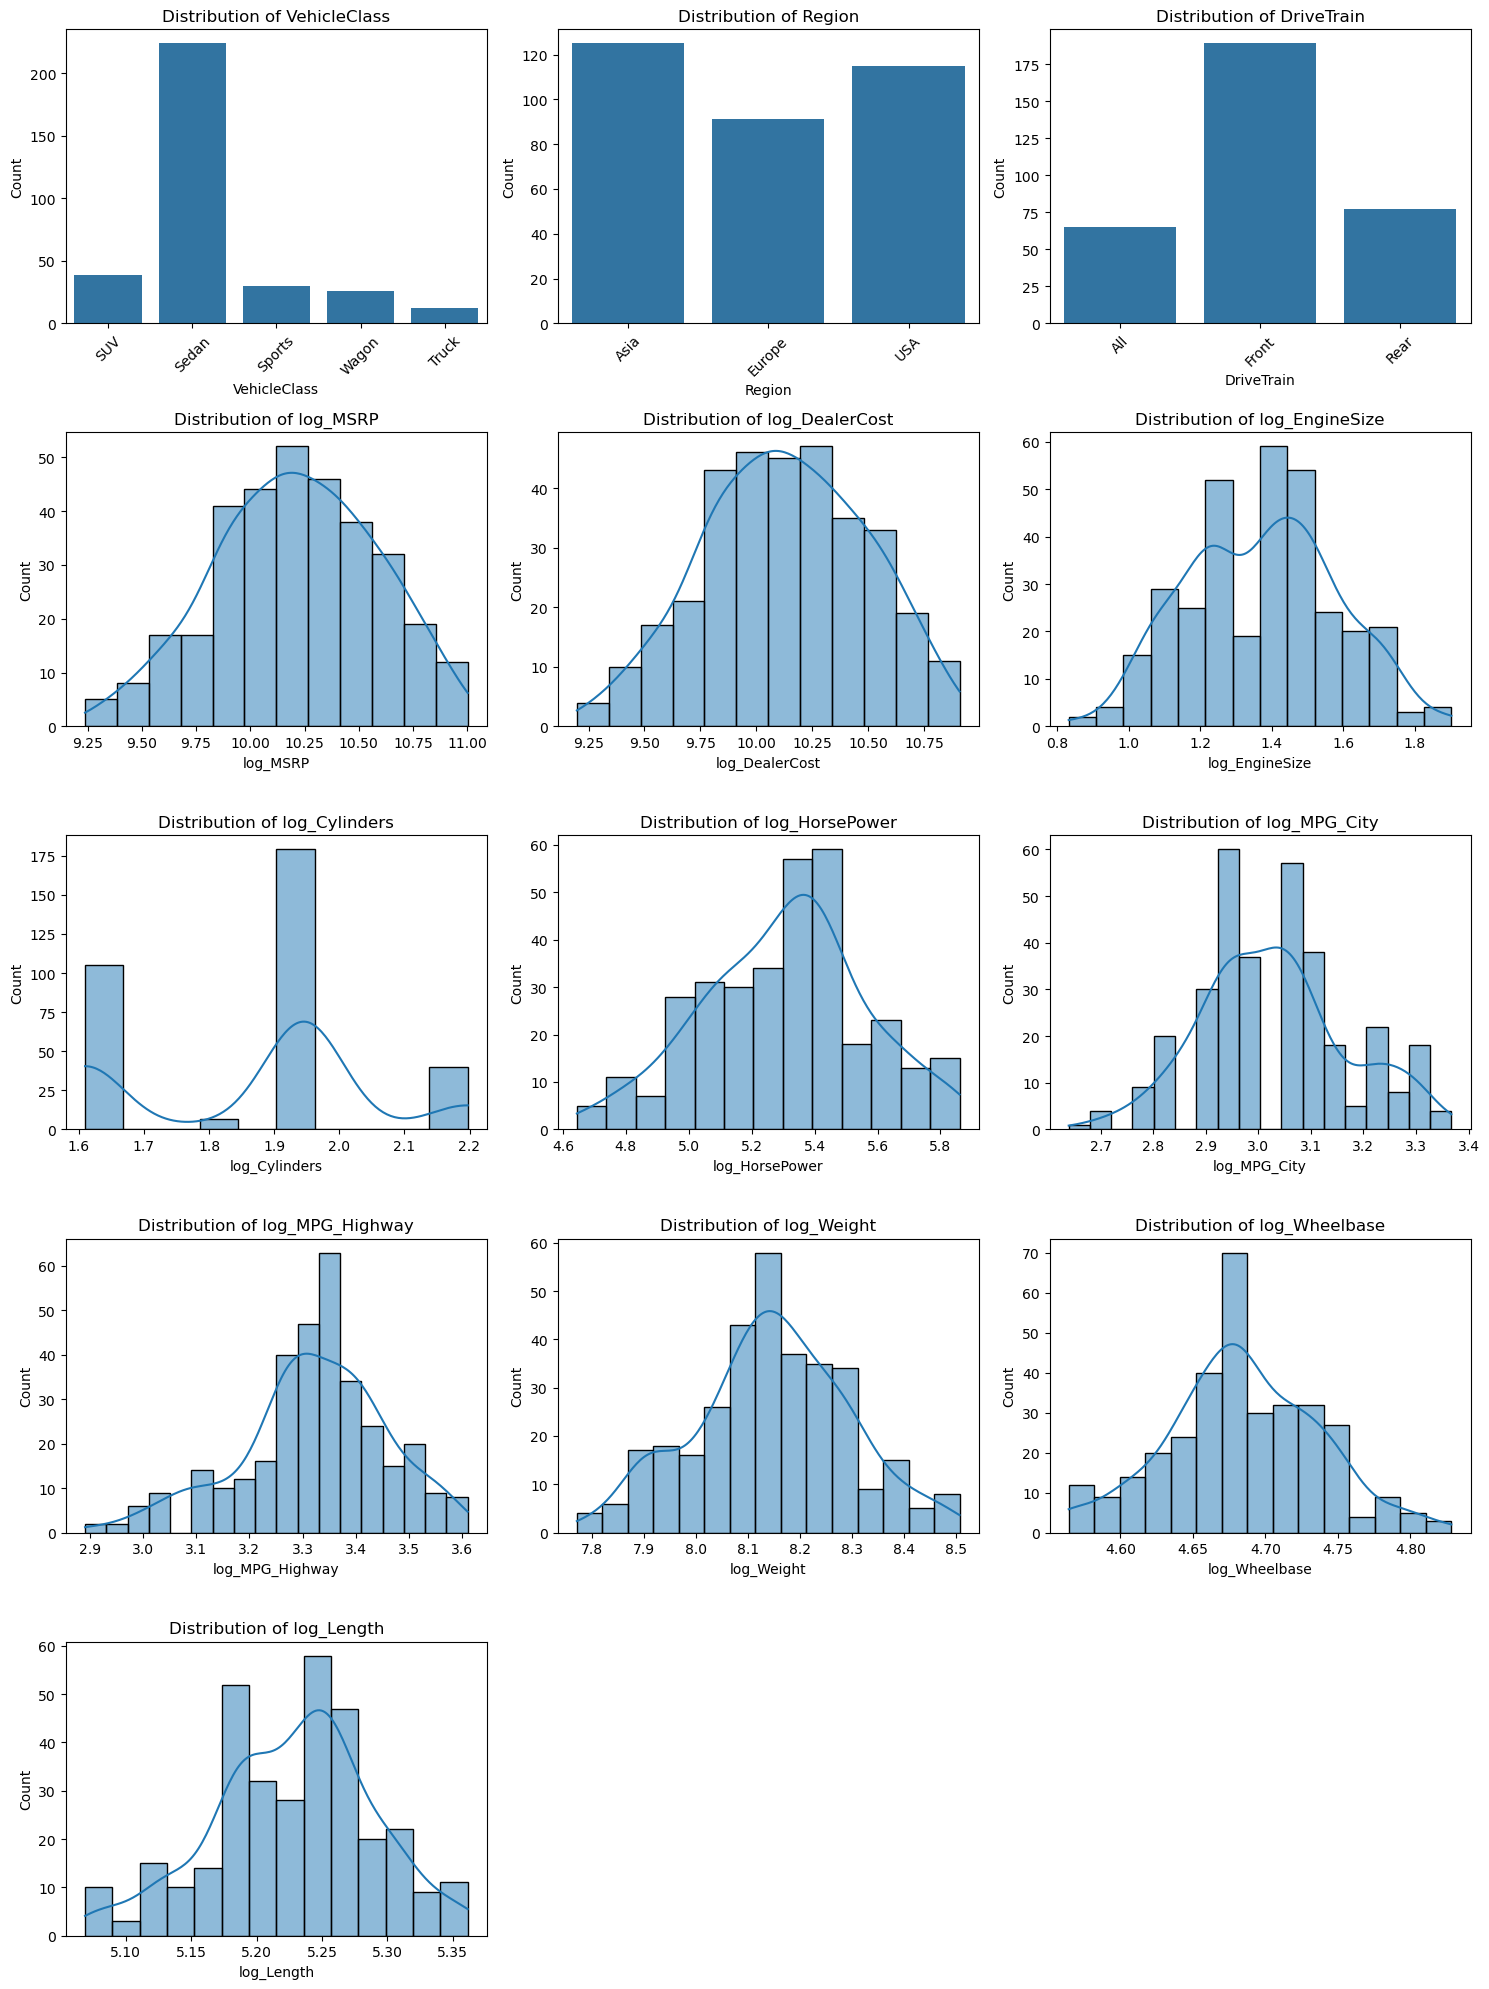

In [41]:
#histogram of numeric columns
# Create histograms for categorical and log columns
categorical_cols = ['VehicleClass', 'Region', 'DriveTrain']
log_cols = [col for col in df.columns if col.startswith('log_')]

# Calculate number of rows and columns for subplot grid
n_cols = 3
n_rows = ((len(categorical_cols) + len(log_cols)) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

# Plot histograms for categorical columns
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Plot histograms for log columns
for idx, col in enumerate(log_cols):
    sns.histplot(data=df, x=col, ax=axes[idx + len(categorical_cols)], kde=True)
    axes[idx + len(categorical_cols)].set_title(f'Distribution of {col}')
    axes[idx + len(categorical_cols)].set_xlabel(col)
    axes[idx + len(categorical_cols)].set_ylabel('Count')

# Remove any empty subplots
for idx in range(len(categorical_cols) + len(log_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()